<a href="https://colab.research.google.com/github/rohit-447/Kaggle-Notebook/blob/main/Pytorch%7C_LeNet_5_%7CCIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fedesoriano_cifar100_path = kagglehub.dataset_download('fedesoriano/cifar100')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
torch.__version__,torchvision.__version__

('2.6.0+cu124', '0.21.0+cu124')

This Code downloads the dataset in the kaggle working directory in datafolder

In [ ]:
cifar10= CIFAR10(root='data', download=True)

100%|██████████| 170M/170M [00:01<00:00, 104MB/s]  


Device Agnoistic Code

In [ ]:

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Import and Download of the CIFAR10 dataset

1. **train_data**: Folder that contains the train datset
2. **test_data**: Folder that contains the test datset


In [ ]:
from torchvision.datasets import CIFAR10
train_data=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=ToTensor(), target_transform=None)

# Getting the Class Name

In [ ]:
#class name as a list
class_name=train_data.classes

#class name as dict
class_name_dict=train_data.class_to_idx

class_name, class_name_dict

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})

# Visualizing an image

Access the first image and label in train_data.

Since the image is represented as a tensor with shape: torch.Size([3, 32, 32]) (i.e., (C, H, W) where C stands for channels, H for height, and W for width), you need to adjust it because matplotlib expects images in the format (H, W, C) — a NumPy array with shape (height, width, channels).

To achieve this, you’ll need to transpose the image from (C, H, W) to (H, W, C) before displaying it using matplotlib.pyplot.imshow.

(-0.5, 31.5, 31.5, -0.5)

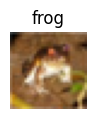

In [ ]:
#Visualizing an image
image, label=train_data[0]
plt.figure(figsize=(1,1))
plt.imshow(image.permute(1,2,0))
plt.title(class_name[label])
plt.axis(False)

In [ ]:
image.shape

torch.Size([3, 32, 32])

# Loading the datset using the DataLoader Function

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

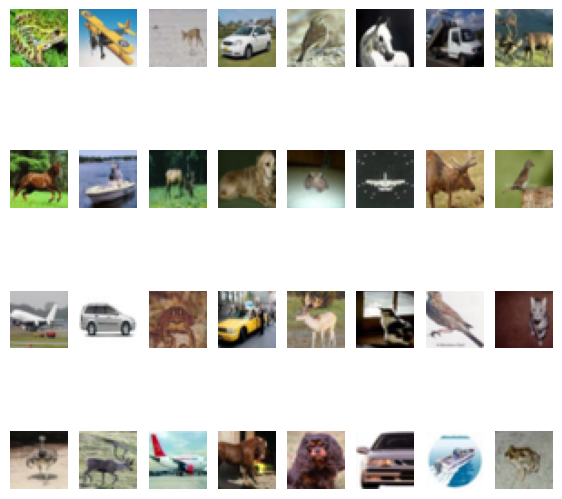

In [ ]:
#visulisation of all the images of a batch
torch.manual_seed(42)
train_featues_batch, test_feature_batch= next(iter(train_dataloader))
fig=plt.figure(figsize=(7,7))
rows=4
cols=8
for i in range(BATCH_SIZE):
    img, label= train_featues_batch[i], test_feature_batch[i]
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False)

In [ ]:
from torch import nn
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.layer1= nn.Sequential(
            #layer 1
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            #layer2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2))

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10))  #total no. of classes is 10 so out feature is 10

    def forward(self, x):
        x=self.layer1(x)
        x=self.classifier(x)
        return x

In [ ]:
from torchsummary import summary
model=LeNet5().to(device)
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              Tanh-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
---------------------------------

In [ ]:
#optimsiser and loss fun
LR=0.1
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(), lr=LR, momentum=0.9)
import torch

def acc_fn(predictions, labels):
    _, predicted_classes = torch.max(predictions, 1)
    correct = torch.eq(predicted_classes, labels).sum().item()
    accuracy = 100 * correct / labels.size(0)

    return accuracy


In [ ]:
#building training and testing loop
from tqdm.auto import tqdm
EPOCH=256
for epoch in tqdm(range(EPOCH)):
    model.train()
    train_loss=0
    test_loss=0
    train_acc=0
    test_acc=0
    for batch, (Image, Label) in enumerate(train_dataloader):
        Image, Label= Image.to(device), Label.to(device)
        Label_pred=model(Image)
        loss=loss_fn(Label_pred,Label)
        train_loss+=loss.item()
        train_acc+=acc_fn(predictions=Label_pred, labels=Label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)
    model.eval()
    with torch.inference_mode():
        for Image, Label in test_dataloader:
            test_pred=model(Image)
            test_loss+=loss_fn(test_pred, Label).item()
            test_acc+= acc_fn(predictions=test_pred, labels= Label)
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"training acc: {train_acc}, test Acc : {test_acc}, train loss : {train_loss}, test_loss : {test_loss}")



  0%|          | 0/256 [00:00<?, ?it/s]

training acc: 10.100767754318618, test Acc : 10.003993610223642, train loss : 3.694029311072117, test_loss : 2.9728643795171865


KeyboardInterrupt: 

In [ ]:
#eval fun
with torch.infernace_mode():
    Label_pred=model(tra)
